## Overview

In this tutorial, we will build a simple aritificial neural network (ANN), also known as multilayer perceptron (MLP) or feedforward neural network (FNN). The learning outcomes are:
1. Understand how the model is formulated mathematically;
2. Understand what is meant by training the network;
3. Experiment with more complex architectures.

## Data

We generate data from a Gaussian process with a specified covariance matrix. The details of data generation do not matter as in reality, you never know the actual data generation machanism.

**The key** here is that we want to predict $y \in R^5$ given the previous values $x\in R^{25}$.

In [1]:
import sys
import os
sys.path.insert(1, '..')
os.chdir('..')
import matplotlib.pyplot as plt
from data_formatters.hall import *
from dataset import TSDataset
from conf import Conf

In [2]:
# loading the config file, setting the experiment name, and the seed for random pre-processing parts (like splitting)
cnf = Conf(conf_file_path='./conf/hall.yaml', seed=15, exp_name="test", log=False)

In [3]:
# Calling data formatter
data_formatter = HALLFormatter(cnf)

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Dropped segments: 89
Extracted segments: 192


In [4]:
# we are going to pass our data formatter and the config file to the TSDataset class
train_dataset =  TSDataset(cnf, data_formatter, data_formatter.train_data)
val_dataset =  TSDataset(cnf, data_formatter, data_formatter.val_data)
test_dataset =  TSDataset(cnf, data_formatter, data_formatter.test_data)

Getting valid sampling locations.
# available segments=33915
Extracting all available segments.
1000 of 33915 samples done...
2000 of 33915 samples done...
3000 of 33915 samples done...
4000 of 33915 samples done...
5000 of 33915 samples done...
6000 of 33915 samples done...
7000 of 33915 samples done...
8000 of 33915 samples done...
9000 of 33915 samples done...
10000 of 33915 samples done...
11000 of 33915 samples done...
12000 of 33915 samples done...
13000 of 33915 samples done...
14000 of 33915 samples done...
15000 of 33915 samples done...
16000 of 33915 samples done...
17000 of 33915 samples done...
18000 of 33915 samples done...
19000 of 33915 samples done...
20000 of 33915 samples done...
21000 of 33915 samples done...
22000 of 33915 samples done...
23000 of 33915 samples done...
24000 of 33915 samples done...
25000 of 33915 samples done...
26000 of 33915 samples done...
27000 of 33915 samples done...
28000 of 33915 samples done...
29000 of 33915 samples done...
30000 of 33915

In [5]:

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# set up torch dataloader
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Linear regression

Suppose we want to model our data as a linear transformation, that is we aim to find $W \in R^{25\times 5}$ so that to minimize the squared error between the prediction and the truth. In summary, we formulate the problem as:
$$
W^* = \argmin_{W} || Y -  XW ||^2
$$

This model is an extension of the model many of us have covered in the introductory statisics courses to a multivariate case. **Recall** that for one-dimensional case (i.e. when $y \in R$) and under some distributional assumptions, this optimization problem has a closed form solution that is guaranteed to be the best (BLUE). When we move to more dimensions and start relaxing the assumptions, we no longer have the closed-form solution. Hence, we need to resort to the apprximate methods. Below, we program the model and see its performance.

In [6]:
import torch
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear_collapse = torch.nn.Linear(6, 1)
        self.linear = torch.nn.Linear(192, 24)
        
    def forward(self, x):
        y_pred = self.linear(torch.squeeze(self.linear_collapse(x)))
        return y_pred

In [8]:
# train model
best_loss = 1e1000
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.000000001)
for epoch in range(10):
    #for i, (inputs, labels) in enumerate(train_loader):
    for i, d in enumerate(train_loader):
        # Forward pass
        outputs = model(d.get('inputs'))
        loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        
        # Backward and optimize
        optimizer.zero_grad() # zero the gradient buffer
        loss.backward() # compute gradient
        optimizer.step() # update parameters
        
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # validate model
    with torch.no_grad():
        # for i, (inputs, labels) in enumerate(val_loader):
        for i, d in enumerate(val_loader):
            outputs = model(d.get('inputs'))
            loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        print ('Epoch [{}/{}], Val Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # save best model based on val loss
    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), 'best_model.pth')
# load best model
model.load_state_dict(torch.load('best_model.pth'))
    

Epoch [1/100], Loss: 1.5650
Epoch [1/100], Val Loss: 1.0070
Epoch [2/100], Loss: 3.0348
Epoch [2/100], Val Loss: 1.0070
Epoch [3/100], Loss: 1.1283
Epoch [3/100], Val Loss: 1.0070
Epoch [4/100], Loss: 1.7403
Epoch [4/100], Val Loss: 1.0070
Epoch [5/100], Loss: 0.8543
Epoch [5/100], Val Loss: 1.0070
Epoch [6/100], Loss: 0.8785
Epoch [6/100], Val Loss: 1.0070
Epoch [7/100], Loss: 0.5583
Epoch [7/100], Val Loss: 1.0070
Epoch [8/100], Loss: 0.9978
Epoch [8/100], Val Loss: 1.0070
Epoch [9/100], Loss: 1.0926
Epoch [9/100], Val Loss: 1.0070
Epoch [10/100], Loss: 1.7408
Epoch [10/100], Val Loss: 1.0070


<All keys matched successfully>

In [12]:
# evaluate model on test set
with torch.no_grad():
    #for i, (inputs, labels) in enumerate(test_loader):
    for i, d in enumerate(test_loader):
        outputs = model(d['inputs'])
        labels = torch.squeeze(d['outputs'])
        loss = criterion(outputs, labels)
    print ('Epoch [{}/{}], Test Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

Epoch [10/100], Test Loss: 0.8182


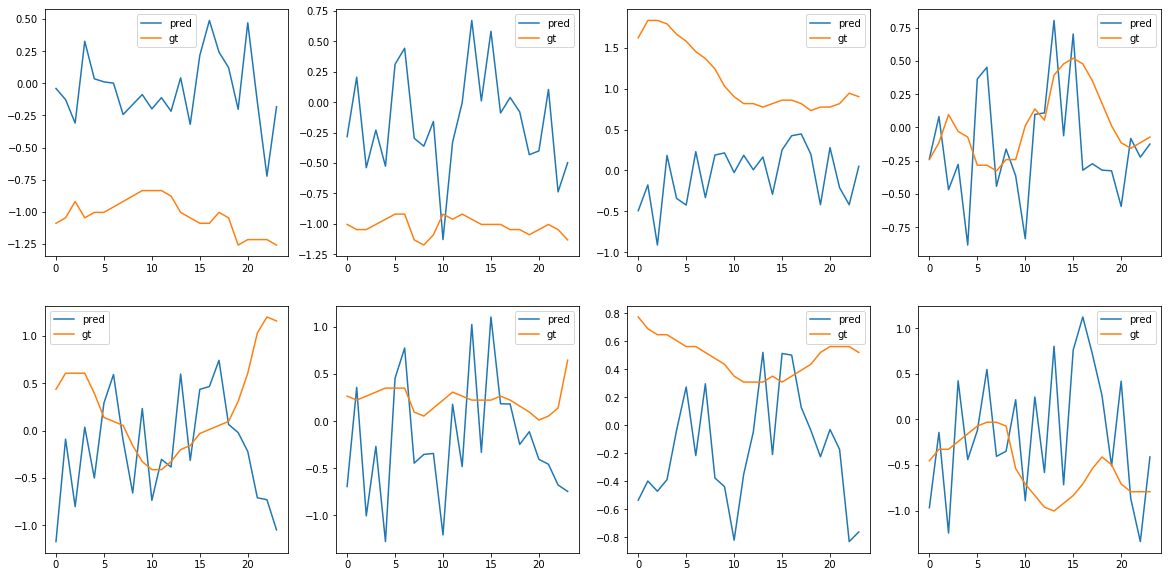

In [13]:
# plots the predictions vs the ground truth
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        ax[i, j].plot(outputs[i*4+j, :], label='pred')
        ax[i, j].plot(labels[i*4+j, :], label='gt')
        ax[i, j].legend()

## Can we do better?

In our case, there is little justification to move beyond the linear regression setting because of how the data is generated. Nevertheless, nobody is stopping us from trying. Let's now formulate our model as: $$\hat y  = (ReLU(XW^{(1)})) W^{(2)},$$
where $W^{(1)} \in R^{25 \times n_1}, W^{(2)} \in R^{n_1 \times 5}$ are learnable weight matrie and $n_1$ is a hyper-parameter we get to choose.

The main points we want to you to notice from this example are:
1. More complex models do not mean better performance;
2. Hyper-parameter tuning is tedious;
3. **Most importantly**, we can learn any differentiable architecture with the help of SGD.

In [ ]:
# define model
import torch
class MLP(torch.nn.Module):
    def __init__(self, n1):
        super(MLP, self).__init__()
        self.linear = torch.nn.Linear(25, n1)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(n1, 5)
        
    def forward(self, x):
        y_pred = self.linear2(self.relu(self.linear(x)))
        return y_pred

In [ ]:
# train model
best_loss = 1e10
model = MLP(100)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad() # zero the gradient buffer
        loss.backward() # compute gradient
        optimizer.step() # update parameters
        
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # validate model
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
        print ('Epoch [{}/{}], Val Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # save best model based on val loss
    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), 'best_model.pth')
# load best model
model.load_state_dict(torch.load('best_model.pth'))

In [ ]:
# evaluate model on test set
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
    print ('Epoch [{}/{}], Test Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

In [ ]:
# plots the predictions vs the ground truth
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        ax[i, j].plot(outputs[i*4+j, :], label='pred')
        ax[i, j].plot(labels[i*4+j, :], label='gt')
        ax[i, j].legend()